# Launch Kickstarter Campaign

In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

# Load data

In [2]:
#load csv file data with headers

data = "Kickstartercombo.csv"
df = pd.read_csv((data), index_col=0)

In [23]:
orig_copy_df = df 

In [24]:
orig_copy_df.head()

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN,0.000000
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN,0.004889
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN,0.000200
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN,0.065795
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN,1.047500


In [3]:
df.shape

(702411, 15)

In [63]:
df.head(10)

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.00,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.00,NaN,NaN,0.000000,58 days 23:24:00
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.00,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.00,NaN,NaN,0.004889,45 days 00:00:00
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.00,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.00,NaN,NaN,0.000200,30 days 01:00:00
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.00,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.00,NaN,NaN,0.065795,55 days 16:25:00
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.00,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.00,NaN,NaN,1.047500,35 days 00:00:00
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.00,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.00,NaN,NaN,1.205000,20 days 00:00:00
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,25000.0,453.00,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40,453.00,NaN,NaN,0.018120,44 days 23:00:00
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Design,Product Design,US,canceled,125000.0,8233.00,USD,2014-04-24 18:14:00,2014-05-29 18:14:00,58,8233.00,NaN,NaN,0.065864,35 days 00:00:00
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,Documentary,US,canceled,65000.0,6240.57,USD,2014-07-11 21:55:00,2014-08-10 21:55:00,43,6240.57,NaN,NaN,0.096009,30 days 00:00:00
9,100004721,Of Jesus and Madmen,Publishing,Nonfiction,CA,failed,2500.0,0.00,CAD,2013-09-09 18:19:00,2013-10-09 18:19:00,0,0.00,NaN,NaN,0.000000,30 days 00:00:00


In [64]:
df.tail(3)

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
702408,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,Narrative Film,US,failed,15000.0,20.0,USD,2010-07-01 19:40:30,2010-08-16,1,20.0,15000.0,20.0,0.001333,45 days 04:19:30
702409,999987933,BioDefense Education Kit,Technology,Technology,US,failed,15000.0,200.0,USD,2016-01-13 18:13:53,2016-02-13,6,200.0,15000.0,200.0,0.013333,30 days 05:46:07
702410,999988282,Nou Renmen Ayiti! We Love Haiti!,Art,Performance Art,US,failed,2000.0,524.0,USD,2011-07-19 09:07:47,2011-08-16,17,524.0,2000.0,524.0,0.262000,27 days 14:52:13


In [65]:
#separate header (column names) 

header = df.head(1)
#data_woHeaders = df.[0:]
#data_woHeaders.head()
header

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN,0.0,58 days 23:24:00


# Explore data

In [66]:
df.columns
#or print(df.columns)

Index([u'ID', u'name', u'main_category', u'category', u'country', u'state',
       u'goal', u'pledged', u'currency', u'launched', u'deadline', u'backers',
       u'usd pledged', u'usd_goal_real', u'usd_pledged_real',
       u'percent_goal_reached', u'time_to_deadline'],
      dtype='object')

In [67]:
df.dtypes

ID                                int64
name                             object
main_category                    object
category                         object
country                          object
state                            object
goal                            float64
pledged                         float64
currency                         object
launched                         object
deadline                         object
backers                           int64
usd pledged                     float64
usd_goal_real                   float64
usd_pledged_real                float64
percent_goal_reached            float64
time_to_deadline        timedelta64[ns]
dtype: object

In [68]:
#number of non-NA values
#len(df) would count rows including NA values
df.count()

ID                      702411
name                    702403
main_category           702411
category                702411
country                 702411
state                   702411
goal                    702411
pledged                 702411
currency                702411
launched                702411
deadline                702411
backers                 702411
usd pledged             694817
usd_goal_real           378661
usd_pledged_real        378661
percent_goal_reached    702411
time_to_deadline        702411
dtype: int64

In [11]:
df['usd pledged'].max()

20338986.27

In [12]:
df['usd pledged'].min()

0.0

In [13]:
df['usd pledged'].mean()

7405.969298263277

In [14]:
df['usd pledged'].median()

456.0

In [15]:
df['usd pledged'].mode()

0    0.0
dtype: float64

In [16]:
df['goal'].max()

100000000.0

In [17]:
df['goal'].min()

0.01

In [12]:
df['usd pledged'].min()

0.0

In [18]:
df['goal'].mean()

48176.42203487713

In [69]:
#descriptive statistics
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
count,7.024110e+05,7.024110e+05,7.024110e+05,702411.000000,6.948170e+05,3.786610e+05,3.786610e+05,702411.000000,702411
mean,1.074829e+09,4.817642e+04,9.223828e+03,103.726589,7.405969e+03,4.545440e+04,9.058924e+03,3.223661,34 days 06:53:56.423551
std,6.192006e+08,1.162920e+06,9.286016e+04,919.654297,8.144094e+04,1.152950e+06,9.097334e+04,269.189581,68 days 08:39:55.289858
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000e+00,0.000000,0 days 00:07:17
25%,5.379594e+08,2.000000e+03,3.000000e+01,2.000000,2.024000e+01,2.000000e+03,3.100000e+01,0.004412,29 days 04:26:14
50%,1.075562e+09,5.000000e+03,6.150000e+02,12.000000,4.560000e+02,5.500000e+03,6.243300e+02,0.133100,30 days 00:00:00
75%,1.610544e+09,1.505600e+04,4.020000e+03,55.000000,3.261000e+03,1.550000e+04,4.050000e+03,1.062667,37 days 03:22:45
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,2.033899e+07,104277.890000,16739 days 08:17:00


## Data Manipulation

In [70]:
df.tail(20)

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
702391,99991751,Here is the oasis for the youngest in the world.,Design,Product Design,CH,failed,80000.0,0.00,CHF,2015-07-06 18:00:47,2015-09-04,0,0.00,82207.27,0.00,0.000000,59 days 05:59:13
702392,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Games,Tabletop Games,FR,successful,1000.0,1246.00,EUR,2017-10-04 11:26:44,2017-10-31,35,66.72,1165.70,1452.47,1.246000,26 days 12:33:16
702393,999931480,Google Glass Shield (Canceled),Technology,3D Printing,US,canceled,6500.0,0.00,USD,2014-05-05 20:22:45,2014-05-26,0,0.00,6500.00,0.00,0.000000,20 days 03:37:15
702394,999934908,The Manual Bar Blade,Design,Product Design,US,successful,3500.0,6169.00,USD,2015-11-23 07:33:14,2015-12-15,120,6169.00,3500.00,6169.00,1.762571,21 days 16:26:46
702395,999941823,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,GB,failed,16000.0,2738.00,GBP,2013-09-10 22:45:26,2013-10-10,38,4281.15,25566.05,4374.99,0.171125,29 days 01:14:34
702396,999943841,The Dog Coffee Book,Publishing,Children's Books,US,successful,950.0,1732.02,USD,2013-10-18 21:35:04,2013-11-30,31,1732.02,950.00,1732.02,1.823179,42 days 02:24:56
702397,999950812,The Cease is Increase,Publishing,Nonfiction,US,failed,4999.0,980.00,USD,2012-08-15 17:11:00,2012-09-14,16,980.00,4999.00,980.00,0.196039,29 days 06:49:00
702398,999955533,Cards and Chit Network Season 2! (Canceled),Games,Tabletop Games,US,canceled,500.0,121.00,USD,2016-01-24 16:03:27,2016-02-23,5,121.00,500.00,121.00,0.242000,29 days 07:56:33
702399,999963618,Colorado International Activism Film Festival,Film & Video,Narrative Film,US,failed,500.0,135.00,USD,2017-02-08 02:28:44,2017-04-09,6,45.00,500.00,135.00,0.270000,59 days 21:31:16
702400,99996661,Date Seat - Boston iOS App,Technology,Apps,US,failed,6000.0,0.00,USD,2016-07-29 15:36:29,2016-09-05,0,0.00,6000.00,0.00,0.000000,37 days 08:23:31


## Data Visualization

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

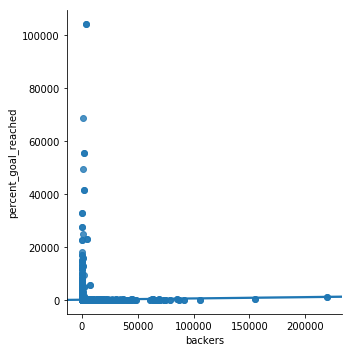

In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#make a scatterplot
%matplotlib inline
sns.lmplot(x='backers', y='percent_goal_reached', data=df)


In [ ]:
#Continue the analysis of the dataset and begin to find optimal features.

In [76]:
df.corr()

,ID,goal,pledged,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached
ID,1.000000,0.001706,0.000260,0.000586,-0.000567,0.001854,-0.000025,-0.001121
goal,0.001706,1.000000,0.007120,0.004450,0.005871,0.942692,0.005104,-0.000467
pledged,0.000260,0.007120,1.000000,0.728756,0.896962,0.005024,0.952843,0.008563
backers,0.000586,0.004450,0.728756,1.000000,0.705763,0.004517,0.752539,0.016565
usd pledged,-0.000567,0.005871,0.896962,0.705763,1.000000,0.006172,0.907743,0.006555
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,1.000000,0.005596,-0.000449
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,0.005596,1.000000,0.009006
percent_goal_reached,-0.001121,-0.000467,0.008563,0.016565,0.006555,-0.000449,0.009006,1.000000


## Feature Engineering

In [21]:
#Percent goal
df['percent_goal_reached'] = df['pledged'] / df['goal'] 

In [ ]:
df.head()

In [30]:
#Selection threshold above 75% 
per_table = df.loc[df['percent_goal_reached'] >= 0.75] #finds rows where the grade is less than or equal to 100 

In [79]:
per_table.head(3)

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
16,1000070642,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.00,USD,2012-08-02 14:11:00,2012-08-17 14:11:00,7,250.000000,NaN,NaN,1.00000,15 days 00:00:00
91,1000413719,Backroads EP Processing Costs,Music,Electronic Music,US,successful,200.0,274.05,USD,2012-10-11 23:32:00,2012-10-26 23:00:00,14,274.050000,NaN,NaN,1.37025,14 days 23:28:00
126,10005784,DOGMA - Short Film,Film & Video,Drama,GB,successful,750.0,756.00,GBP,2015-03-06 15:13:00,2015-03-20 01:00:00,15,1153.311037,NaN,NaN,1.00800,13 days 09:47:00


In [33]:
per_table['percent_goal_reached'].max()

104277.89

In [34]:
per_table.describe()

,ID,goal,pledged,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached
count,2.566240e+05,2.566240e+05,2.566240e+05,256624.000000,2.530960e+05,1.388290e+05,1.388290e+05,256624.000000
mean,1.074167e+09,9.977258e+03,2.276172e+04,254.854795,1.824828e+04,9.563801e+03,2.242774e+04,8.678957
std,6.190190e+08,3.052985e+04,1.521950e+05,1505.951363,1.339849e+05,2.778788e+04,1.490387e+05,445.301768
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,1.000000e-02,7.900000e-01,0.750000
25%,5.360387e+08,1.300000e+03,1.965000e+03,31.000000,1.363930e+03,1.338890e+03,2.000000e+03,1.042400
50%,1.076959e+09,3.800000e+03,5.063000e+03,68.000000,4.046000e+03,3.867870e+03,5.100000e+03,1.156046
75%,1.608556e+09,1.000000e+04,1.288400e+04,162.000000,1.095000e+04,1.000000e+04,1.313045e+04,1.583368
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.015609e+06,2.033899e+07,104277.890000


In [35]:
per_table.head()

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN,1.0475
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.0,NaN,NaN,1.2050
10,100005484,Lisa Lim New CD!,Music,Indie Rock,US,successful,12500.0,12700.0,USD,2013-03-09 06:42:00,2013-04-08 06:42:00,100,12700.0,NaN,NaN,1.0160
16,1000070642,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.0,USD,2012-08-02 14:11:00,2012-08-17 14:11:00,7,250.0,NaN,NaN,1.0000
18,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,US,successful,20000.0,34268.0,USD,2013-11-25 07:06:00,2013-12-30 07:06:00,624,34268.0,NaN,NaN,1.7134


In [47]:
#time to reach goal
#df['time_to_reachGoal'] = df['deadline']- df['launched']
df['time_to_deadline'] = pd.to_datetime(df['deadline']) - pd.to_datetime(df['launched'])



In [80]:
df.head(2)

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN,0.000000,58 days 23:24:00
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN,0.004889,45 days 00:00:00


In [49]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
count,7.024110e+05,7.024110e+05,7.024110e+05,702411.000000,6.948170e+05,3.786610e+05,3.786610e+05,702411.000000,702411
mean,1.074829e+09,4.817642e+04,9.223828e+03,103.726589,7.405969e+03,4.545440e+04,9.058924e+03,3.223661,34 days 06:53:56.423551
std,6.192006e+08,1.162920e+06,9.286016e+04,919.654297,8.144094e+04,1.152950e+06,9.097334e+04,269.189581,68 days 08:39:55.289858
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000e+00,0.000000,0 days 00:07:17
25%,5.379594e+08,2.000000e+03,3.000000e+01,2.000000,2.024000e+01,2.000000e+03,3.100000e+01,0.004412,29 days 04:26:14
50%,1.075562e+09,5.000000e+03,6.150000e+02,12.000000,4.560000e+02,5.500000e+03,6.243300e+02,0.133100,30 days 00:00:00
75%,1.610544e+09,1.505600e+04,4.020000e+03,55.000000,3.261000e+03,1.550000e+04,4.050000e+03,1.062667,37 days 03:22:45
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,2.033899e+07,104277.890000,16739 days 08:17:00


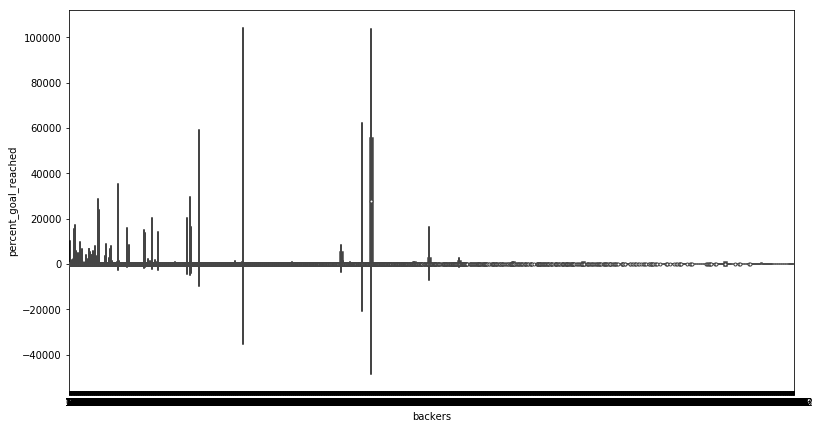

In [82]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of %goal reached for each backer
sns.violinplot(x='backers', y='percent_goal_reached', data=df)

In [59]:
#Selection threshold above 75% 
per_table = df.loc[df['time_to_deadline'] <= "15 days"] #finds rows where the grade is less than or equal to 100 

In [60]:
per_table.head()

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,percent_goal_reached,time_to_deadline
16,1000070642,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.00,USD,2012-08-02 14:11:00,2012-08-17 14:11:00,7,250.000000,NaN,NaN,1.000000,15 days 00:00:00
91,1000413719,Backroads EP Processing Costs,Music,Electronic Music,US,successful,200.0,274.05,USD,2012-10-11 23:32:00,2012-10-26 23:00:00,14,274.050000,NaN,NaN,1.370250,14 days 23:28:00
126,10005784,DOGMA - Short Film,Film & Video,Drama,GB,successful,750.0,756.00,GBP,2015-03-06 15:13:00,2015-03-20 01:00:00,15,1153.311037,NaN,NaN,1.008000,13 days 09:47:00
153,1000707541,Elephant Gun Media Blitzkrieg,Music,Music,US,successful,777.0,923.00,USD,2011-10-20 23:51:00,2011-11-04 06:00:00,36,923.000000,NaN,NaN,1.187902,14 days 06:09:00
171,1000785030,Day of the Dead Tyrion Lannister Calavera Viny...,Art,Illustration,US,successful,275.0,642.00,USD,2015-01-03 04:12:00,2015-01-17 04:12:00,40,642.000000,NaN,NaN,2.334545,14 days 00:00:00


In [51]:
import statsmodels.formula.api as smf

In [56]:
per_table.to_csv('Fred-W-L-N.csv',index=False,header=False)

In [84]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

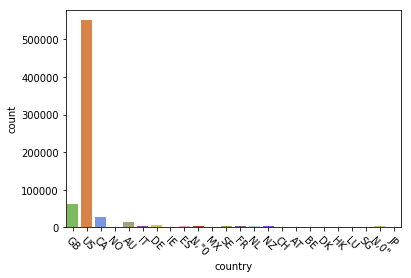

In [85]:
#create a bar plot of cut frequency
sns.countplot(x='country',
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

In [ ]:
df['country'].value_counts() 

In [86]:
#data = dataset, target = dependent variable, feature_names = column headers, DESCR = data dictionary
df.keys()

Index([u'ID', u'name', u'main_category', u'category', u'country', u'state',
       u'goal', u'pledged', u'currency', u'launched', u'deadline', u'backers',
       u'usd pledged', u'usd_goal_real', u'usd_pledged_real',
       u'percent_goal_reached', u'time_to_deadline'],
      dtype='object')

## Feature Selection 

#### Important functions to keep in mind while fitting a linear regression model are:

- lm.fit() -> fits a linear model 


- lm.predict() -> Predict Y using the linear model with estimated coefficients 


- lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 



##### Get rid of columns that we don't want to use in the model